In [1]:
# Missing forest or median imputation

# pairplot
# correlation matrices

# weighting multiple times


In [75]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [76]:
diagnoses = pd.read_csv('dx_100k.tsv', delimiter='\t')

In [77]:
diagnoses.head()

,P_ID,DX_ID,DX_DATE,DX_NAME,CURRENT_ICD9_LIST,CURRENT_ICD10_LIST,DX_GROUP
0,15,12453646,30404,LEFT CENTRAL RETINAL VEIN OCCLUSION W MACULAR ...,NaN,H34.8120,NaN
1,15,12122523,30413,ATYPICAL CHEST PAIN,786.59,R07.89,"SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS"
2,15,12021313,30413,HX OF THYROID CANCER,V10.87,Z85.850,V CODES
3,15,12015529,30413,ESSENTIAL HTN,401.9,I10,CIRCULATORY SYSTEM
4,15,12143339,30413,BPH W URINARY OBSTRUCTION,"600.01, 599.69","N40.1, N13.8",NaN


In [78]:
diagnoses[diagnoses.P_ID==3459918]

,P_ID,DX_ID,DX_DATE,DX_NAME,CURRENT_ICD9_LIST,CURRENT_ICD10_LIST,DX_GROUP
2086754,3459918,12019017,27747,CANCER METASTATIC TO LIVER,197.7,C78.7,NEOPLASMS
2086755,3459918,12019017,27747,CANCER METASTATIC TO LIVER,197.7,C78.7,NEOPLASMS
2086756,3459918,12019015,27748,CANCER METASTATIC TO LN,196.9,C77.9,NEOPLASMS
2086757,3459918,12019015,27748,CANCER METASTATIC TO LN,196.9,C77.9,NEOPLASMS
2086758,3459918,12020638,27748,IRON DEFICIENCY ANEMIA,280.9,D50.9,BLOOD AND BLOOD-FORMING ORGANS
2086759,3459918,12020638,27748,IRON DEFICIENCY ANEMIA,280.9,D50.9,BLOOD AND BLOOD-FORMING ORGANS
2086760,3459918,12019017,27748,CANCER METASTATIC TO LIVER,197.7,C78.7,NEOPLASMS
2086761,3459918,12019017,27748,CANCER METASTATIC TO LIVER,197.7,C78.7,NEOPLASMS
2086762,3459918,12021354,27748,HX OF STOMACH CANCER,V10.04,Z85.028,V CODES
2086763,3459918,12021354,27748,HX OF STOMACH CANCER,V10.04,Z85.028,V CODES


In [79]:
from collections import OrderedDict

In [80]:
diagnoses.DX_ID.head()

0    12453646
1    12122523
2    12021313
3    12015529
4    12143339
Name: DX_ID, dtype: int64

In [81]:
count = diagnoses.DX_ID.value_counts()
count[count > 500]

diagnoses = diagnoses[diagnoses.DX_ID.isin(count[count > 500].index)]

In [82]:
y = pd.DataFrame(diagnoses.sort_values('DX_DATE').groupby(['P_ID'])['DX_ID'].apply(list))

In [83]:
y = y.apply(lambda x: list(OrderedDict.fromkeys(x['DX_ID'])), axis=1)

In [84]:
y = pd.DataFrame(y)
y.rename(columns={y.columns[0]: "DX_ID" }, inplace = True)

In [85]:
dic = dict.fromkeys(diagnoses['DX_ID'], 0)

In [86]:
j = 0
for i in dic:
    dic[i] = j
    j += 1

In [87]:
from itertools import combinations

In [88]:
def getPairs(x):
    return list(combinations([dic[a] for a in x['DX_ID']], 2))

In [148]:
sub = y.loc[:100]

In [150]:
sub['pairs'] = sub.apply(getPairs, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
y['PAIRS'] = y.apply(getPairs, axis=1)

In [90]:
y.head()

,DX_ID,PAIRS
P_ID,,
15,"[12122523, 12015529, 12014097, 12125461, 12013...","[(0, 1), (0, 3), (0, 2), (0, 4), (0, 5), (0, 6..."
34,"[12141609, 12019633, 12019572, 12014948, 12019...","[(31, 32), (31, 15), (31, 33), (31, 34), (31, ..."
105,"[12135089, 12018614, 12014941, 12134159, 12123...","[(52, 36), (52, 53), (52, 54), (52, 55), (52, ..."
227,"[12124478, 121129783, 12139368, 12134697, 1202...","[(68, 82), (68, 81), (68, 11), (68, 16), (68, ..."
246,"[12015145, 12153114, 12152973, 12018250, 12112...","[(83, 8), (83, 87), (83, 7), (83, 88), (83, 84..."


In [45]:
y = y.reset_index()

In [46]:
y.P_ID.nunique()

84053

In [47]:
flat_list = [item for sublist in y.PAIRS.tolist() for item in sublist]

In [48]:
import keras.backend as K
from keras.utils import to_categorical


In [49]:
x,y = zip(*flat_list)

In [50]:
len(x)

6929731

In [51]:
hot_x = to_categorical(x)
hot_y = to_categorical(y)

In [56]:
# a=dx_data.CURRENT_ICD10_LIST.dropna().apply(lambda x:x.split(','))
# dex = 0
# b = []
# for dx in a:
#     b.append(pd.DataFrame({'P_ID':dx_data.loc[0].P_ID,'DX_DATE':dx_data.loc[0].DX_DATE,'ICD_10':dx}))
#     dex +=1
#     if dex%1000 ==0:
#         print(dex)
np.save('x_data_hot', hot_x)
np.save('y_data_hot', hot_y)


In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.callbacks import TensorBoard
from keras.layers import Input, Dense, LSTM, Dropout
from keras.models import Model


input_dat = Input(shape=(756,))
encoded = Dense(280, activation='relu')(input_dat)
encoded = Dense(36)(encoded)
decoded = Dense(756, activation='softmax')(encoded)
embeddings = Model(input_dat, decoded)

encoder = Model(input_dat, encoded)


embeddings.compile(optimizer='adam', loss='categorical_crossentropy')
embeddings.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 756)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 280)               211960    
_________________________________________________________________
dense_2 (Dense)              (None, 36)                10116     
_________________________________________________________________
dense_3 (Dense)              (None, 756)               27972     
Total params: 250,048
Trainable params: 250,048
Non-trainable params: 0
_________________________________________________________________


In [1]:
embeddings.fit(hot_x, hot_y,
                epochs=50,
                batch_size=512,
                shuffle=True,
                validation_data=(hot_x, hot_y))

NameError: name 'embeddings' is not defined

In [455]:
labels = np.identity(80)
encoded = encoder.predict(labels)


In [457]:
keys = dic.keys()

In [459]:
encoded.shape

(80, 36)

In [462]:
keys = list(keys)

In [463]:
np.savetxt("embeddings_data.tsv", encoded, delimiter="\t")
pd.Series(keys).to_csv('labels.tsv', sep='\t', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


# Visualizations of the data

In [10]:
import pandas as pd
import numpy as np

patients = pd.read_csv('../embeddings_pat_sumdata.tsv', delimiter='\t', header=None)
patient_diseases = pd.read_csv('../pat_all_disease.tsv', delimiter='\t', header=None)
patient_labels = pd.read_csv('../pat_labels.tsv', delimiter='\t', header=None)

In [6]:
diseases = pd.read_csv('../embeddings_data.tsv', delimiter='\t', header=None)
disease_names = pd.read_csv('../labels.tsv', delimiter='\t', header=None)

In [9]:
diseases.shape

(756, 36)

In [2]:
import pickle
disease_dict = pickle.load(open('../embeddings.p', 'rb'))

* The file embeddings.p contains the embeddings with each key as the diagnosis name
* The file embeddings_756.p containts the embeddings with each key as the diagnosis id

In [3]:
disease_dict

{'ABNORMALITY OF ORGANS & SOFT TISSUES OF PELVIS': array([-0.4457044 , -1.2584915 ,  0.29953656, -2.5442886 , -0.09581978,
        -1.9753196 , -0.5440597 , -2.4496002 ,  0.84061325,  0.44207382,
        -1.2700589 ,  1.426107  ,  3.1313746 , -1.486573  ,  1.5491829 ,
         0.42603797, -1.0397941 ,  0.29274136,  2.315418  , -3.4409893 ,
        -2.9341724 , -3.7363079 ,  1.0981178 ,  1.1907917 , -1.9178611 ,
        -2.1463723 , -0.4945482 ,  0.15742251, -0.48524755, -1.0006853 ,
        -1.4351138 , -0.09320705,  2.8828387 ,  1.6440387 ,  1.0912563 ,
         0.8778608 ], dtype=float32),
 'ACQUIRED ABSENCE OF OTHER ORGANS AND TISSUE': array([-1.1249151 , -2.5394366 ,  1.3563317 , -0.07232261, -0.5312577 ,
        -3.0519214 , -0.47820807, -0.16338699,  1.72608   ,  2.4916427 ,
         2.5040145 ,  1.0590413 ,  1.1986585 ,  3.219906  , -0.6478094 ,
        -0.34010416, -1.0033635 , -1.588895  ,  0.90925986, -0.8855226 ,
         0.54186136, -1.6277436 ,  0.28009412, -1.7117451 ,  0

In [4]:
l=[]
for val in disease_dict.values():
    l.append(val)

In [5]:
import numpy as np
l = np.array(l)

In [8]:
np.array(list(disease_dict.keys()))[x]

array(['OTHER AND ILL-DEFINED SPRAINS AND STRAINS',
       'DISORDERS OF MUSCLE LIGAMENT AND FASCIA', 'VISUAL DISTURBANCES',
       'OTHER CONGENITAL ANOMALIES OF LIMBS', 'PULMONARY TUBERCULOSIS',
       'DZ ORAL SOFT TISS EXCLD LES SPECIFIC GING&TONGUE',
       'CERTAIN CONGENITAL MUSCULOSKELETAL DEFORMITIES',
       'OTHER AND UNSPECIFIED DISORDERS OF JOINT',
       'SPECIFIC DELAYS IN DEVELOPMENT', 'DISEASES OF SEBACEOUS GLANDS',
       'SYMPTOMS INVLV NERVOUS&MUSCULOSKELETAL SYSTEMS',
       'FACIAL NERVE DISORDERS', 'GASTROINTESTINAL HEMORRHAGE',
       'DENTOFACIAL ANOMALIES INCLUDING MALOCCLUSION',
       'MONONEURITIS OF LOWER LIMB AND UNSPECIFIED SITE',
       'SYMPTOMS INVLV RESP SYSTEM&OTH CHST SYMPTOMS',
       'PERSONAL HISTORY OF OTHER DISEASES',
       'OTHER DISEASES&CONDS TEETH&SUPPORTING STRUCTURES',
       'MYELOID LEUKEMIA',
       'SYMPTOMS CONCERNING NUTRITION METABOLISM&DVLP',
       'OCCLUSION OF CEREBRAL ARTERIES',
       'OTHER DISEASES OF UPPER RESPIRATORY TR

In [7]:
x=l[:,0].argsort()

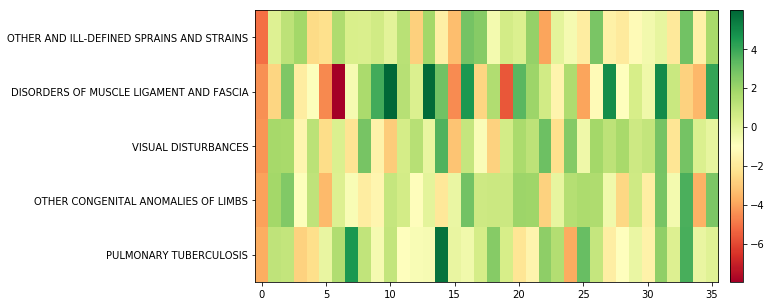

In [57]:
import matplotlib.pyplot as plt
# fig,ax=plt.subplots(figsize=(10,8))
# ax.imshow(l[x[:10],:],cmap='RdYlGn')
# ax.set_yticks([0,1,2,3,4,5,6,7,8,9])
# ax.set_yticklabels(np.array(list(disease_dict.keys()))[x[:10]])

# cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
# cb = plt.colorbar(ax, cax = cbaxes)  

fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(l[x[:5],:], cmap='RdYlGn', aspect='auto')
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(np.array(list(disease_dict.keys()))[x[:5]])
fig.colorbar(im, orientation="vertical", pad=0.02)
plt.show()


In [35]:
pca_patients = pd.DataFrame(pd.read_json('../patientPCA.txt').projections.iloc[0])

In [42]:
pca_patients.head()


,pca-0,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9
0,-3.929579,-2.605724,-4.165620,-0.856348,0.905270,-0.998151,-2.570572,-0.297196,0.500593,1.277851
1,-13.027224,4.588961,-4.601832,-2.307404,4.117184,4.360068,-1.052134,2.617409,1.416287,-0.728946
2,-14.806201,4.085189,-1.218535,0.039809,2.122019,3.113433,-0.801056,-0.055421,1.871081,-1.246193
3,-1.562460,-1.091479,-1.144506,0.212314,0.366479,-0.573517,0.190020,0.483214,1.130958,-0.249888
4,-2.686466,-1.327549,-1.228026,2.810779,0.054149,-1.362625,-0.144035,0.737416,2.707501,0.845049


In [36]:
patient_labels.shape[0] == pca_patients.shape[0]
    

True

In [37]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10, random_state=0).fit(pca_patients)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


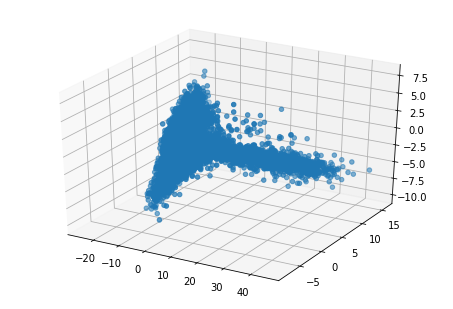

In [44]:
fig = plt.figure()
ax = Axes3D(fig)

f1 = pca_patients['pca-0']
f2 = pca_patients['pca-1']
f3 = pca_patients['pca-2']

ax.scatter(f1, f2, f3)
plt.show()

In [65]:
pats_info = pd.read_csv('pats_100k.tsv', delimiter='\t')
pats_ages = pats_info[['P_ID', 'AGE']]

In [102]:
pats_sex = pats_info[['P_ID', 'FEMALE']]

In [69]:
age_df = patient_labels.merge(pats_ages, left_on=0, right_on='P_ID', how='inner')

In [103]:
sex_df = patient_labels.merge(pats_sex, left_on=0, right_on='P_ID', how='inner')

In [72]:
(age_df[0] != age_df['P_ID']).sum()

0

In [73]:
age_df.drop(0, axis=1, inplace=True)

In [104]:
sex_df.drop(0, axis=1, inplace=True)

In [45]:
y_means = km.predict(pca_patients)


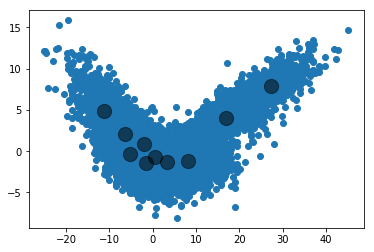

In [47]:
plt.scatter(pca_patients['pca-0'], pca_patients['pca-1'])

centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, hue=)


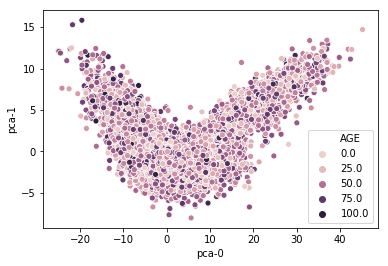

In [100]:
data_vis = pd.DataFrame([pca_patients['pca-0'], pca_patients['pca-1'], age_df['AGE']]).T
data_vis.head()
plt = sns.scatterplot(data=data_vis, x='pca-0', y='pca-1',hue='AGE')
# age distributions look about the same

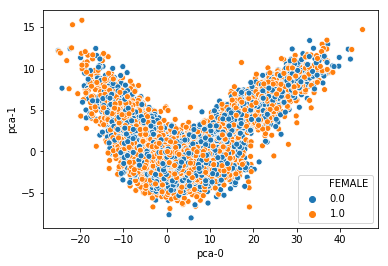

In [105]:
data_vis = pd.DataFrame([pca_patients['pca-0'], pca_patients['pca-1'], sex_df['FEMALE']]).T
data_vis.head()
plt = sns.scatterplot(data=data_vis, x='pca-0', y='pca-1',hue='FEMALE')

In [48]:
pca_diags = pd.DataFrame(pd.read_json('../diagPCA.txt').projections.iloc[0])

In [50]:
diseases.shape[0] == pca_diags.shape[0]


True

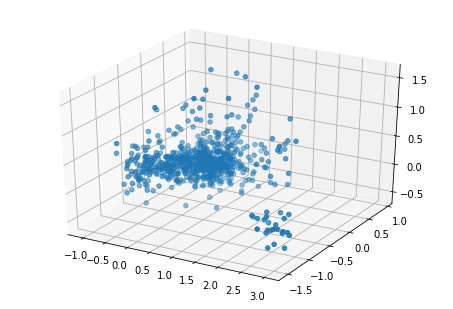

In [54]:

km1 = KMeans(n_clusters=10, random_state=0).fit(pca_diags)

y_means = km1.predict(pca_diags)

fig = plt.figure()
ax = Axes3D(fig)

f1 = pca_diags['pca-0']
f2 = pca_diags['pca-1']
f3 = pca_diags['pca-2']

ax.scatter(f1, f2, f3)
plt.show()

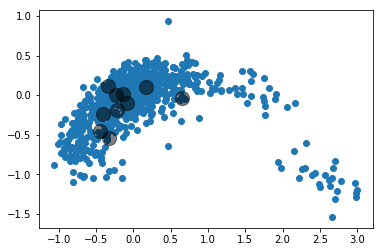

In [55]:
plt.scatter(pca_diags['pca-0'], pca_diags['pca-1'])

centers = km1.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

## * Looks like many pregnancy diagnoses are far from the clusters (bottom right)
## * Desensitivation to Allergens also is far from the clusters (top center)

In [56]:
tsne_diags = pd.DataFrame(pd.read_json('../diagTSNE.txt').projections.iloc[0])

tsne_diags.head()

,pca-0,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,tsne-0,tsne-1,tsne-2
0,0.110666,-0.043710,-0.086916,-0.029296,-0.257529,0.023150,-0.136242,-0.135782,-0.074322,-0.137094,-22.526249,5.118253,35.226149
1,-0.548784,-0.172216,-0.058754,0.043084,0.051914,0.054429,0.033641,0.106980,0.043937,-0.095070,16.102589,16.463785,-6.940797
2,-0.371235,-0.220719,-0.279510,-0.035760,-0.032070,-0.064646,-0.133839,-0.136871,-0.155737,-0.045583,27.585961,24.517944,-4.807767
3,0.156644,0.116292,0.199316,-0.206258,-0.120916,-0.006233,-0.062410,-0.199009,-0.147481,-0.070566,-4.647705,-7.972315,-10.638220
4,-0.269944,0.015575,-0.052592,0.040326,-0.077553,-0.007476,0.125989,0.060866,0.035725,-0.022506,16.067868,19.862105,-7.053128


In [58]:
tsne_diags_r = tsne_diags[['tsne-0', 'tsne-1', 'tsne-2']]

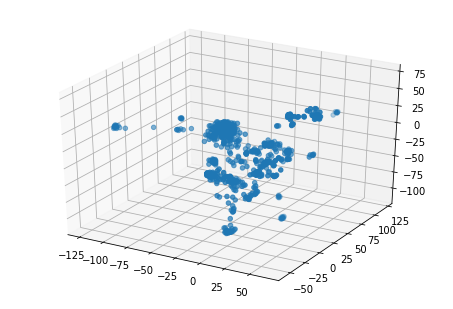

In [60]:
diseases.shape[0] == pca_diags.shape[0]



km2 = KMeans(n_clusters=10, random_state=0).fit(tsne_diags_r)

y_means = km2.predict(tsne_diags_r)

fig = plt.figure()
ax = Axes3D(fig)

f1 = tsne_diags_r['tsne-0']
f2 = tsne_diags_r['tsne-1']
f3 = tsne_diags_r['tsne-2']

ax.scatter(f1, f2, f3)
plt.show()

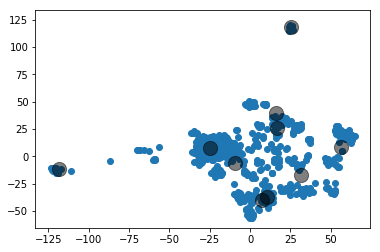

In [61]:
plt.scatter(tsne_diags_r['tsne-0'], tsne_diags_r['tsne-1'])

centers = km2.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

## * Top right cluster is arthritis diagnosis and therapy
## * Cluster on the right is cancer and pain medication codings

In [ ]:
#############################
#import pandas              #
#import numpy as np         #
#import tensorflow as tf    #
#############################

